In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder    

In [11]:
df=pd.read_csv("sample1.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Columns: 106 entries, loan_amnt to debt_settlement_flag
dtypes: float64(73), int64(11), object(22)
memory usage: 23.9+ MB


In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,40000,40000,40000.0,60 months,16.99,993.89,D,D1,Product Regulatory Specialist,< 1 year,...,100.0,12.5,0.0,0.0,137720.0,95327.0,50200.0,84120.0,Cash,N
1,12000,12000,12000.0,60 months,10.42,257.46,B,B3,Ass't Manger,10+ years,...,88.0,75.0,0.0,0.0,33590.0,22017.0,8190.0,3500.0,Cash,N
2,15000,15000,15000.0,36 months,8.90,476.30,A,A5,Project Manager,< 1 year,...,100.0,28.6,0.0,0.0,99814.0,61898.0,28000.0,63414.0,Cash,N
3,15000,15000,15000.0,60 months,16.14,365.89,C,C4,Freight Cordinator,10+ years,...,100.0,33.3,0.0,0.0,54470.0,35867.0,11500.0,42470.0,Cash,N
4,12000,12000,12000.0,36 months,19.42,442.43,D,D3,Loan and Member Services II,5 years,...,100.0,0.0,0.0,0.0,44686.0,25618.0,19300.0,19586.0,Cash,N


In [11]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=106)

In [12]:
df.isnull().sum()

loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2112
emp_length                         1841
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
purpose                               0
title                               319
zip_code                              0
addr_state                            0
dti                                  21
delinq_2yrs                           0
earliest_cr_line                      0
inq_last_6mths                        0
mths_since_last_delinq            15203


In [13]:
round(df.isnull().sum()/len(df.index), 2)*100

loan_amnt                          0.0
funded_amnt                        0.0
funded_amnt_inv                    0.0
term                               0.0
int_rate                           0.0
installment                        0.0
grade                              0.0
sub_grade                          0.0
emp_title                          7.0
emp_length                         6.0
home_ownership                     0.0
annual_inc                         0.0
verification_status                0.0
issue_d                            0.0
loan_status                        0.0
pymnt_plan                         0.0
purpose                            0.0
title                              1.0
zip_code                           0.0
addr_state                         0.0
dti                                0.0
delinq_2yrs                        0.0
earliest_cr_line                   0.0
inq_last_6mths                     0.0
mths_since_last_delinq            52.0
mths_since_last_record   

In [14]:
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 65]
print(missing_columns)

Index(['mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq'],
      dtype='object')


In [15]:
df = df.drop(missing_columns, axis=1)

In [17]:
df = df.drop(['sub_grade', 'emp_title','emp_length', 'issue_d','pymnt_plan', 'purpose','title', 'zip_code','addr_state','earliest_cr_line', 'total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d','next_pymnt_d','last_credit_pull_d', 'collections_12_mths_ex_med','policy_code','acc_now_delinq','tot_coll_amt'], axis=1)

In [18]:
df.shape

(29503, 82)

In [29]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     13778
Current        12363
Charged Off     3362
Name: loan_status, dtype: int64

In [19]:
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    13778
1     3362
Name: loan_status, dtype: int64

In [20]:
le = LabelEncoder() 
  
df['grade']= le.fit_transform(df['grade']) 
df['home_ownership']= le.fit_transform(df['home_ownership'])
df['verification_status']= le.fit_transform(df['verification_status']) 
df['disbursement_method']= le.fit_transform(df['disbursement_method'])
df['debt_settlement_flag']= le.fit_transform(df['debt_settlement_flag'])
df['term']= le.fit_transform(df['term'])
df['initial_list_status']= le.fit_transform(df['initial_list_status'])
df['application_type']= le.fit_transform(df['application_type'])

In [21]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,40000,40000,40000.0,1,16.99,993.89,3,1,100000.0,2,...,100.0,12.5,0.0,0.0,137720.0,95327.0,50200.0,84120.0,0,0
2,15000,15000,15000.0,0,8.90,476.30,0,5,65000.0,0,...,100.0,28.6,0.0,0.0,99814.0,61898.0,28000.0,63414.0,0,0


In [22]:
df.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
home_ownership                   0
annual_inc                       0
verification_status              0
loan_status                      0
dti                              5
delinq_2yrs                      0
inq_last_6mths                   0
mths_since_last_delinq        8586
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      11
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
total_rec_int                    0
last_pymnt_amnt                  0
application_type    

In [23]:
df.fillna(df.mean(), inplace=True)

In [25]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
last_pymnt_amnt               0
application_type              0
tot_cur_bal                   0
                             ..
mo_sin_o

In [26]:
round(np.mean(df['loan_status']), 2)

0.2

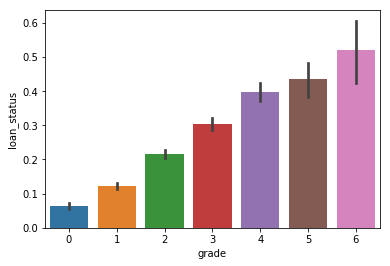

In [27]:
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [28]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

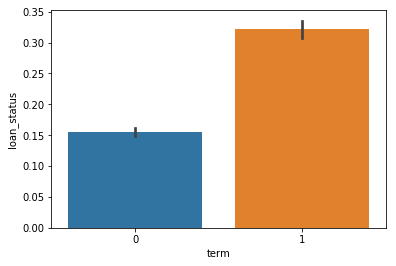

In [29]:
plot_cat('term')

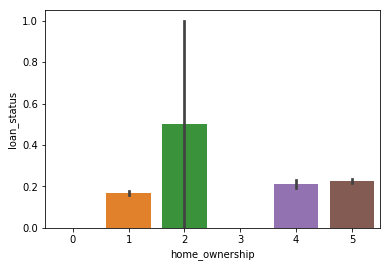

In [30]:
plot_cat('home_ownership')

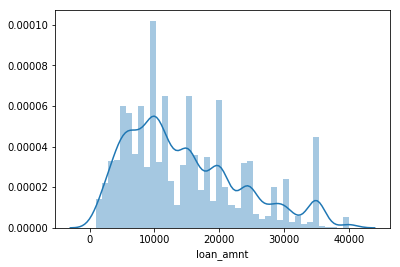

In [34]:
sns.distplot(df['loan_amnt'])
plt.show()

In [35]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [36]:
df['loan_amnt'].value_counts()

medium       7939
high         4900
very high    2528
low          1773
Name: loan_amnt, dtype: int64

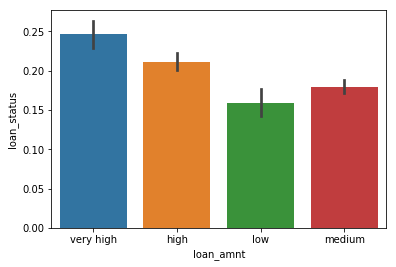

In [37]:
plot_cat('loan_amnt')

In [38]:
y=df['loan_status']

In [40]:
df = df.drop(['loan_status'], axis=1)

In [47]:
df['loan_amnt']= le.fit_transform(df['loan_amnt'])

In [49]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
xtrain, xtest, ytrain, ytest = train_test_split( df, y, test_size=1/7.0, random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(xtrain)
# Apply transform to both the training set and the test set.
xtrain_1 = scaler.transform(xtrain)
xtest_1 = scaler.transform(xtest)

C:\Users\eparuji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eparuji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\eparuji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [52]:
xtrain_1.shape

(14691, 81)

In [70]:
model1 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model1.fit(xtrain_1, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

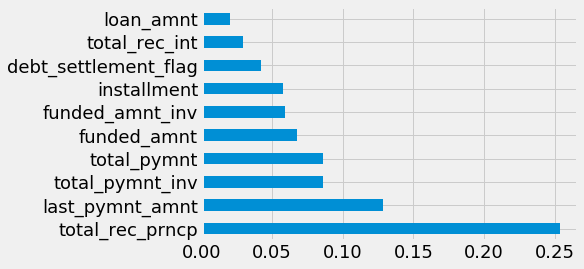

In [75]:
feat_importances = pd.Series(model1.feature_importances_, index=xtrain.columns)
#feat_importances.plot(kind='barh')
feat_importances.nlargest(10).plot(kind='barh')

In [53]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [54]:
pca.fit(xtrain_1)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
xtrain_2 = pca.transform(xtrain_1)
xtext_2 = pca.transform(xtest_1)

In [57]:
xtrain_2.shape

(14691, 50)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(xtrain_2, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
rf_predictions = model.predict(xtext_2)
# Probabilities for each class
rf_probs = model.predict_proba(xtext_2)[:, 1]

In [62]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(ytest, rf_probs)

In [63]:
print(roc_value)

0.9238400488400487


In [104]:
accuracy = accuracy_score(ytest, rf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.12%


In [64]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [65]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [66]:
print(model.feature_importances_)

[0.0155372  0.02497495 0.01338009 0.02168896 0.02003634 0.00971681
 0.01087503 0.01690077 0.01158232 0.05578415 0.00987343 0.01047114
 0.01262453 0.0110735  0.01497101 0.00970975 0.03215    0.03924873
 0.01057324 0.02038897 0.0115205  0.04702183 0.01041974 0.01153089
 0.00901132 0.00924607 0.01071531 0.00964226 0.01323516 0.00996499
 0.0133482  0.00932154 0.01175272 0.01334258 0.02128091 0.05345638
 0.01035731 0.009056   0.01138953 0.0229451  0.00935825 0.0100254
 0.01072536 0.01519973 0.01768789 0.03330017 0.04865898 0.1214905
 0.03328103 0.01015342]


Feature ranking:
1. feature 47 (0.121490)
2. feature 9 (0.055784)
3. feature 35 (0.053456)
4. feature 46 (0.048659)
5. feature 21 (0.047022)
6. feature 17 (0.039249)
7. feature 45 (0.033300)
8. feature 48 (0.033281)
9. feature 16 (0.032150)
10. feature 1 (0.024975)
11. feature 39 (0.022945)
12. feature 3 (0.021689)
13. feature 34 (0.021281)
14. feature 19 (0.020389)
15. feature 4 (0.020036)
16. feature 44 (0.017688)
17. feature 7 (0.016901)
18. feature 0 (0.015537)
19. feature 43 (0.015200)
20. feature 14 (0.014971)
21. feature 2 (0.013380)
22. feature 30 (0.013348)
23. feature 33 (0.013343)
24. feature 28 (0.013235)
25. feature 12 (0.012625)
26. feature 32 (0.011753)
27. feature 8 (0.011582)
28. feature 23 (0.011531)
29. feature 20 (0.011520)
30. feature 38 (0.011390)
31. feature 13 (0.011073)
32. feature 6 (0.010875)
33. feature 42 (0.010725)
34. feature 26 (0.010715)
35. feature 18 (0.010573)
36. feature 11 (0.010471)
37. feature 22 (0.010420)
38. feature 36 (0.010357)
39. feature 4

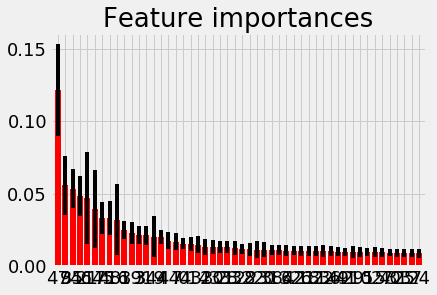

In [68]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(xtrain_2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(xtrain_2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(xtrain_2.shape[1]), indices)
plt.xlim([-1, xtrain_2.shape[1]])
plt.show()

In [83]:
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

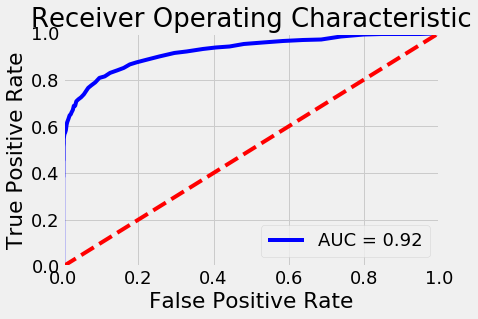

In [84]:
from sklearn import metrics
plot_roc(model, xtext_2, ytest)

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, rf_predictions) 
cm

array([[1979,    2],
       [ 240,  228]], dtype=int64)

In [89]:
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [97]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(ytest, model, labels=[0, 1])
    classes=["Fully paid", "Not Fully paid"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

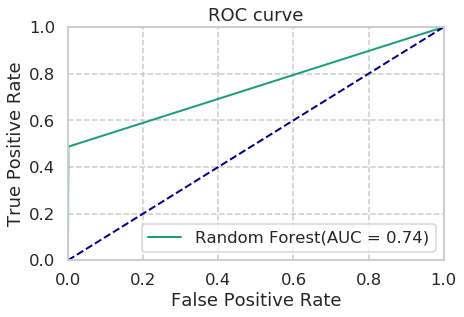

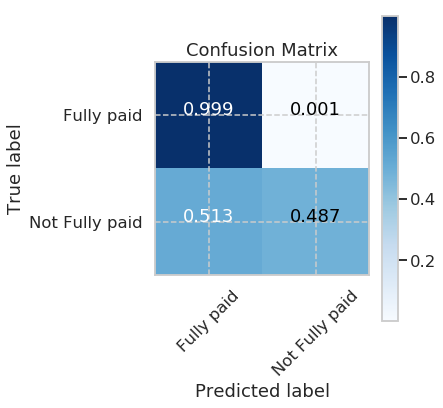

In [98]:
plotAUC(ytest,rf_predictions, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rf_predictions, normalize=True)
plt.show()

In [100]:
from xgboost import XGBClassifier
model3 = XGBClassifier()
model3.fit(xtrain_2, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [101]:
y_pred = model3.predict(xtext_2)
predictions = [round(value) for value in y_pred]

In [103]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.28%


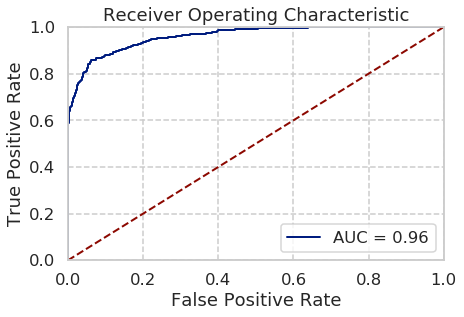

In [105]:
from sklearn import metrics
plot_roc(model3, xtext_2, ytest)

In [106]:
cm1 = confusion_matrix(ytest, predictions) 
cm1

array([[1974,    7],
       [ 182,  286]], dtype=int64)

In [108]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model3, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(ytest, model3, labels=[0, 1])
    classes=["Fully paid", "Not Fully paid"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

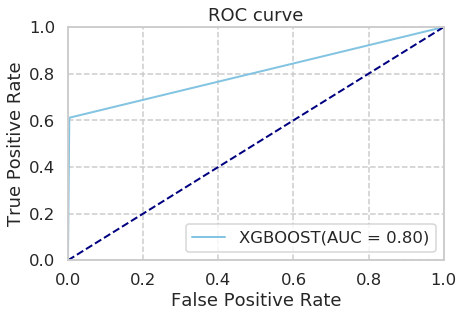

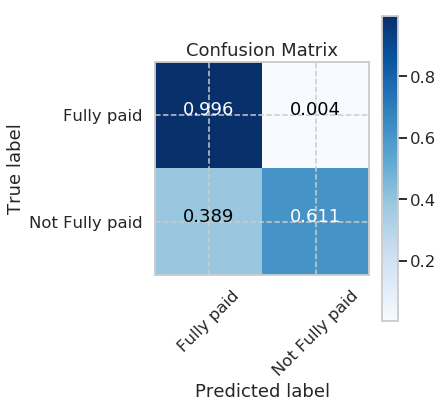

In [109]:
plotAUC(ytest,predictions, 'XGBOOST')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=True)
plt.show()